# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
import random
import torch

from collections import deque
import matplotlib.pyplot as plt
% matplotlib inline

from ddpg_agent import Agent

In [3]:
from workspace_utils import active_session

In [4]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [7]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.29999999329447746


When finished, you can close the environment.

In [8]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

## Model training

In [9]:
SEED = 2

In [10]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=SEED)

In [13]:
def ddpg(n_episodes=50000, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    mean_scores = []
    moving_avg_scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  
        states = env_info.vector_observations
        agent.reset()
        scores = np.zeros(num_agents)
        for t in range(max_t):
            actions = agent.act(states, add_noise=True) 
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards 
            dones = env_info.local_done
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            states = next_states
            scores += rewards
            if any(dones):
                break
        
        mean_scores.append(np.mean(scores))
        scores_deque.append(np.mean(scores))
        moving_avg_scores.append(np.mean(scores_deque))
                
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="\n")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        
        if moving_avg_scores[-1] >= 30.0 and i_episode >= 100:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, moving_avg_scores[-1]))            
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')

            break
            
    return mean_scores, moving_avg_scores

In [14]:
with active_session():
    mean_scores, moving_avg_scores = ddpg()

Episode 1	Average Score: 0.19
Episode 2	Average Score: 0.39
Episode 3	Average Score: 0.30
Episode 4	Average Score: 0.22
Episode 5	Average Score: 0.36
Episode 6	Average Score: 0.32
Episode 7	Average Score: 0.30
Episode 8	Average Score: 0.28
Episode 9	Average Score: 0.32
Episode 10	Average Score: 0.40
Episode 11	Average Score: 0.40
Episode 12	Average Score: 0.50
Episode 13	Average Score: 0.47
Episode 14	Average Score: 0.48
Episode 15	Average Score: 0.55
Episode 16	Average Score: 0.54
Episode 17	Average Score: 0.55
Episode 18	Average Score: 0.54
Episode 19	Average Score: 0.54
Episode 20	Average Score: 0.52
Episode 21	Average Score: 0.50
Episode 22	Average Score: 0.52
Episode 23	Average Score: 0.54
Episode 24	Average Score: 0.52
Episode 25	Average Score: 0.52
Episode 26	Average Score: 0.52
Episode 27	Average Score: 0.56
Episode 28	Average Score: 0.56
Episode 29	Average Score: 0.57
Episode 30	Average Score: 0.56
Episode 31	Average Score: 0.57
Episode 32	Average Score: 0.57
Episode 33	Averag

Episode 259	Average Score: 7.76
Episode 260	Average Score: 7.80
Episode 261	Average Score: 7.83
Episode 262	Average Score: 7.87
Episode 263	Average Score: 7.86
Episode 264	Average Score: 7.92
Episode 265	Average Score: 7.95
Episode 266	Average Score: 8.04
Episode 267	Average Score: 8.10
Episode 268	Average Score: 8.12
Episode 269	Average Score: 8.15
Episode 270	Average Score: 8.17
Episode 271	Average Score: 8.17
Episode 272	Average Score: 8.24
Episode 273	Average Score: 8.22
Episode 274	Average Score: 8.31
Episode 275	Average Score: 8.38
Episode 276	Average Score: 8.49
Episode 277	Average Score: 8.53
Episode 278	Average Score: 8.58
Episode 279	Average Score: 8.62
Episode 280	Average Score: 8.62
Episode 281	Average Score: 8.66
Episode 282	Average Score: 8.68
Episode 283	Average Score: 8.69
Episode 284	Average Score: 8.75
Episode 285	Average Score: 8.77
Episode 286	Average Score: 8.80
Episode 287	Average Score: 8.75
Episode 288	Average Score: 8.80
Episode 289	Average Score: 8.87
Episode 

Episode 507	Average Score: 14.00
Episode 508	Average Score: 13.98
Episode 509	Average Score: 14.00
Episode 510	Average Score: 14.08
Episode 511	Average Score: 14.14
Episode 512	Average Score: 14.17
Episode 513	Average Score: 14.09
Episode 514	Average Score: 14.13
Episode 515	Average Score: 14.19
Episode 516	Average Score: 14.20
Episode 517	Average Score: 14.19
Episode 518	Average Score: 14.20
Episode 519	Average Score: 14.26
Episode 520	Average Score: 14.31
Episode 521	Average Score: 14.29
Episode 522	Average Score: 14.38
Episode 523	Average Score: 14.51
Episode 524	Average Score: 14.53
Episode 525	Average Score: 14.53
Episode 526	Average Score: 14.52
Episode 527	Average Score: 14.55
Episode 528	Average Score: 14.68
Episode 529	Average Score: 14.75
Episode 530	Average Score: 14.75
Episode 531	Average Score: 14.80
Episode 532	Average Score: 14.89
Episode 533	Average Score: 14.89
Episode 534	Average Score: 14.98
Episode 535	Average Score: 15.01
Episode 536	Average Score: 15.01
Episode 53

Episode 754	Average Score: 25.45
Episode 755	Average Score: 25.47
Episode 756	Average Score: 25.62
Episode 757	Average Score: 25.66
Episode 758	Average Score: 25.76
Episode 759	Average Score: 25.89
Episode 760	Average Score: 26.01
Episode 761	Average Score: 26.14
Episode 762	Average Score: 26.39
Episode 763	Average Score: 26.45
Episode 764	Average Score: 26.53
Episode 765	Average Score: 26.70
Episode 766	Average Score: 26.83
Episode 767	Average Score: 26.86
Episode 768	Average Score: 26.95
Episode 769	Average Score: 27.04
Episode 770	Average Score: 27.15
Episode 771	Average Score: 27.33
Episode 772	Average Score: 27.26
Episode 773	Average Score: 27.35
Episode 774	Average Score: 27.56
Episode 775	Average Score: 27.55
Episode 776	Average Score: 27.60
Episode 777	Average Score: 27.72
Episode 778	Average Score: 27.87
Episode 779	Average Score: 28.03
Episode 780	Average Score: 28.11
Episode 781	Average Score: 28.25
Episode 782	Average Score: 28.42
Episode 783	Average Score: 28.53
Episode 78

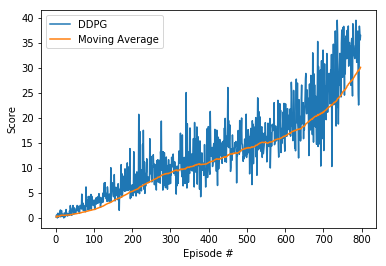

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(mean_scores)+1), mean_scores, label='DDPG')
plt.plot(np.arange(1, len(moving_avg_scores)+1), moving_avg_scores, label='Moving Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()